### Задача 1
 
Даны значения зарплат из выборки выпускников:
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.
Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.
Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [5]:
import numpy as np
import pandas as pd

Пусть дана выборка $x = (x_1, x_2, \dots, x_m)$ из значений одномерной случайной величины. Одной из наиболее естественных статистик таких выборок является __среднее арифметическое__ (или __выборочное среднее__):

$$\overline{x} = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m x_i.$$

Выборочное среднее является оценкой для математического ожидания.

In [3]:
x = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]
print(len(x))

20


In [31]:
mean_salary = sum(x) / len(x)
print(f'среднее арифметическое зарплат из выборки выпускников: {mean_salary}')

среднее арифметическое: 65.3


In [35]:
df = pd.DataFrame([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150], columns = ['salary'])
df

,salary
0,100
1,80
2,75
3,77
4,89
5,33
6,45
7,25
8,65
9,17


Проверка:

In [36]:
df['salary'].mean()

65.3

Другой важной статистикой выборки является __среднее квадратическое отклонение__:

$$\sigma = \sqrt{\dfrac{1}{m} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2}.$$

Оно показывает уровень «разброса» элементов выборки относительно выборочного среднего.


In [37]:
 (df['salary'] - df['salary'].mean()) ** 2

0     1204.09
1      216.09
2       94.09
3      136.89
4      561.69
5     1043.29
6      412.09
7     1624.09
8        0.09
9     2332.89
10    1246.09
11    1705.69
12      68.89
13     106.09
14      22.09
15      94.09
16       0.09
17     349.69
18     610.09
19    7174.09
Name: salary, dtype: float64

In [38]:
salary_std = np.sqrt(((df['salary'] - df['salary'].mean()) ** 2).sum() / df['salary'].count())
print(f'среднее квадратическое отклонение зарплат из выборки выпускников: {salary_std}')

среднее квадратическое отклонение зарплат из выборки выпускников: 30.823854398825596


Проверка:

In [39]:
df['salary'].std(ddof=0)

30.823854398825596

Дисперсию случайной величины можно оценивать средним квадратическим отклонением выборки, возведённым в квадрат:

$$\sigma^2 = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2.$$


Такая оценка дисперсии называется __смещённой выборочной дисперсией__.

In [40]:
salary_variance = ((df['salary'] - df['salary'].mean()) ** 2).sum() / df['salary'].count()
print(f'смещённая выборочная дисперсия зарплат из выборки выпускников: {salary_variance}')

смещённая выборочная дисперсия зарплат из выборки выпускников: 950.11


Проверка:

Оценки дисперсии можно посчитать с помощью метода `.var`. Смещённая:

In [41]:
df['salary'].var(ddof=0)

950.11


$$\sigma_{\text{unbiased}}^2 = \dfrac{1}{m - 1} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2.$$

Почему несмещённая?

На самом деле каждый объект из выборки — это тоже случайная величина (поскольку выбирается _случайным_ образом). В таком случае и любая статистика (т.е. функция от выборки) является случайной величиной.

Оценка некоторого параметра случайной величины называется __несмещённой__, если математическое ожидание этой оценки равняется реальному значению этого параметра.

Например, выборочное среднее является несмещённой оценкой математического ожидания.

Оказывается, среднее квадратическое отклонение, возведённое в квадрат, не является несмещённой оценкой реальной дисперсии: если берётся выборка $x = (x_1, x_2, \dots, x_m)$ из значений случайной величины $X$, то

$$M(\sigma^2) = \dfrac{m - 1}{m} \cdot D(X).$$

Поэтому для оценки дисперсии используется именно несмещённая выборочная дисперсия.

In [42]:
salary_var_nesm = ((df['salary'] - df['salary'].mean())**2).sum() / (df['salary'].count() - 1)
print(f'несмещённая выборочная дисперсия зарплат из выборки выпускников: {salary_var_nesm}')

несмещённая выборочная дисперсия зарплат из выборки выпускников: 1000.1157894736842


Проверка (несмещённая):

In [43]:
df['salary'].var(ddof=1)

1000.1157894736842

### Задача 2
 
Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.


Понятие __квантиля__ обобщает понятие медианы. Если $\alpha \in (0, 1)$, то квантилем порядка $\alpha$ называется такое значение $X_\alpha$, что

$$P(X \leq X_\alpha) \geq \alpha, \text{ } P(X \geq X_\alpha) \geq 1 - \alpha.$$

На практике это означает, что ровно доля $\alpha$ от всех значений выборки оказываются меньше, либо равны $X_\alpha$ и, наоборот, доля $1 - \alpha$ от значений больше, либо равны $X_\alpha$.

В частности, медиана является квантилем порядка $0.5$. Кроме того, часто используют

* __первый квартиль__ — квантиль порядка $0.25$ (т.е. значение, которое не превышают $25 \%$ значений из выборки),
* __второй квартиль__ — то же, что и медиана,
* __третий квартиль__ — квантиль порядка $0.75$.

Квантили можно посчитать с помощью метода `.quantile`:


In [47]:
df['salary'].quantile([0.25, 0.5, 0.75])

0.25    42.0
0.50    67.5
0.75    81.0
Name: salary, dtype: float64

In [55]:
print('первый квартиль: ', df['salary'].quantile(0.25))
print('третий квартиль: ', df['salary'].quantile(0.75))

первый квартиль:  42.0
третий квартиль:  81.0


__Интерквартильный размах__ — это отрезок между первым и третьим квартилями. Это отрезок, в который попадают $50 \%$ значений выборки.

Интерквартильный размах используется для измерения разброса значений выборки вокруг среднего. Иногда его использование оказывается более предпочтительным, чем использование среднего квадратического отклонения, поскольку не учитывает выбросы в данных.

Например, в наших данных интерквартильный размах — это отрезок от $180$ до $188$. _Интерквартильное расстояние_ в этом случае равно $8$.

In [57]:
print('Интерквартильный размах: ', df['salary'].quantile(0.75) - df['salary'].quantile(0.25))

Интерквартильный размах:  39.0


Один из способов визуализировать одномерные данные — __boxplot__ или __ящик с усами__. В самом ящике отмечены квартили $Q1$, $Q2$ (медиана), $Q3$. «Усы» здесь — границы отрезка
$\left[ Q1 - 1.5 \times IQR, \text{ } Q3 + 1.5 \times IQR \right],$
где $IQR$ — интерквартильное расстояние.

Построим boxplot зарплат из выборки выпускников

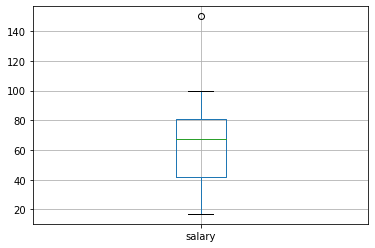

In [45]:
df[['salary']].boxplot()

Всё, что выходит за границы этого отрезка, считается выбросами (отмечены кружками). Посчитаем, сколько значений роста оказалось за пределами «усов».

In [62]:
q1 = df['salary'].quantile(0.25)
q3 = df['salary'].quantile(0.75)
iqr = q3 - q1

boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
print('Усы: ', boxplot_range)

Усы:  (-16.5, 139.5)


In [63]:
outliers = df.loc[(df['salary'] < boxplot_range[0]) | (df['salary'] > boxplot_range[1])]

print(outliers.shape[0], 'значений роста оказалось за пределами «усов»')

1 значений роста оказалось за пределами «усов»


Доля выбросов:

In [60]:
outliers.shape[0] / df.shape[0]

0.05

### Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?
Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

Какова вероятность, что он учится: 

    a) на факультете A? 
    
    б) на факультете B? 
    
    в) на факультете C?

Введем полную группу гипотез:

A = (Студент - факультета A)

B = (Студент - факультета B)

C = (Студент - факультета C)

Найдем вероятности гипотез по классическому определению вероятности:
    
Пусть студентов с факультета A - x , тогда студентов с факультета B - x , а студентов с факультета C - 2x . 

Получаем вероятность что сдавать экзамен будет студент A, B, C:

P(A) = x / (x + x + 2x) = 0.25

P(B) = x / (x + x + 2x) = 0.25

P(C) = 2x / (x + x + 2x) = 0.5

Введем событие V = (Студент сдал первую сессию)

Нам известно:

P(V|A) = 0.8

P(V|B) = 0.7

P(V|C) = 0.9


Тогда вероятность события V найдем по формуле полной вероятности 

P(V) = P(V|A)*P(A) + P(V|B)*P(B) + P(V|C)*P(C)

In [66]:
0.8*0.25+0.7*0.25+0.9*0.5

0.825

Введем события:

V1 - Студент сдал первую сессию учится на факультете A 

Это событие произойдет, если Студент, который сдал первую сессию учится на факультете A и не учится на факультете B, C

V2 - Студент сдал первую сессию учится на факультете B

Это событие произойдет, если Студент, который сдал первую сессию учится на факультете B и не учится на факультете A, C

V3 - Студент сдал первую сессию учится на факультете C 

Это событие произойдет, если Студент, который сдал первую сессию учится на факультете C и не учится на факультете B, A

то есть:  

P(V1) = P(V|A)P(A)

P(V2) = P(V|B)P(B)

P(V3) = P(V|C)P(C)

In [69]:
v1 = 0.8*0.25
v2 = 0.7*0.25
v3 = 0.9*0.5

In [74]:
print(f'Bероятность, что Студент, который сдал первую сессию учится:\n\n a) на факультете A - {v1}\n б) на факультете B - {v2}\n в) на факультете C - {v3}')

Bероятность, что Студент, который сдал первую сессию учится:

 a) на факультете A - 0.2
 б) на факультете B - 0.175
 в) на факультете C - 0.45
